# REINFORCE

---

In this notebook, we will train REINFORCE with OpenAI Gym's Cartpole environment.


**NB: this notebook is only instructor-supplied code**


### 1. Import the Necessary Packages

In [2]:
import gym
gym.logger.set_level(40) # suppress warnings (please remove if gives error)
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

import torch
torch.manual_seed(0) # set random seed
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

!python -m pip install pyvirtualdisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

  Using cached https://files.pythonhosted.org/packages/ad/05/6568620fed440941b704664b9cfe5f836ad699ac7694745e7787fbdc8063/PyVirtualDisplay-2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/48/3c/75573613641c90c6d094059ac28adb748560d99bd27ee6f80cce398f404e/EasyProcess-0.3-py2.py3-none-any.whl


### 2. Define the Architecture of the Policy

In [3]:
env = gym.make('CartPole-v0')
env.seed(0)
print('observation space:', env.observation_space)
print('action space:', env.action_space)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Policy(nn.Module):
    def __init__(self, s_size=4, h_size=16, a_size=2):
        super(Policy, self).__init__()
        self.fc1 = nn.Linear(s_size, h_size)
        self.fc2 = nn.Linear(h_size, a_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)
    
    def act(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        probs = self.forward(state).cpu()
        # Categorical class allows division of categories by probabilities of occurrence
        # sample() of an object returns one category randomly chosen per the probability distribution
        # log_prob() returns the log of the probability of the indicated category
        m = Categorical(probs)
        action = m.sample()
        return action.item(), m.log_prob(action)

observation space: Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
action space: Discrete(2)


### 3. Train the Agent with REINFORCE

In [4]:
policy = Policy().to(device)
optimizer = optim.Adam(policy.parameters(), lr=1e-2)

def reinforce(n_episodes=1500, max_t=1000, gamma=1.0, print_every=100):
    scores_deque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, n_episodes+1):
        saved_log_probs = []
        rewards = []
        state = env.reset()
        for t in range(max_t):
            action, log_prob = policy.act(state)
            saved_log_probs.append(log_prob)
            state, reward, done, _ = env.step(action)
            rewards.append(reward)
            if done:
                break 
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))
        
        discounts = [gamma**i for i in range(len(rewards)+1)]
        R = sum([a*b for a,b in zip(discounts, rewards)])
        #print("\nsaved_log_probs = ", saved_log_probs)
        #print("R = ", R)
        
        policy_loss = []
        for log_prob in saved_log_probs:
            policy_loss.append(-log_prob * R)
        #print("before: policy_loss = ", policy_loss)
        policy_loss = torch.cat(policy_loss).sum()
        #print("after : policy_loss = ", policy_loss)
        
        optimizer.zero_grad()
        policy_loss.backward()
        optimizer.step()
        
        if i_episode % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=195.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            break
        
    return scores
    
scores = reinforce(n_episodes=2000)

act: m =  Categorical()
     probs =  tensor([[ 0.4105,  0.5895]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.5285])
act: m =  Categorical()
     probs =  tensor([[ 0.3969,  0.6031]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.9241])
act: m =  Categorical()
     probs =  tensor([[ 0.4096,  0.5904]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.5270])
act: m =  Categorical()
     probs =  tensor([[ 0.3960,  0.6040]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.5042])
act: m =  Categorical()
     probs =  tensor([[ 0.3862,  0.6138]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.9514])
act: m =  Categorical()
     probs =  tensor([[ 0.3943,  0.6057]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.9307])
act: m =  Categorical()
     probs =  tensor([[ 0.4067,  0.5933]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.5221])
act: m

act: m =  Categorical()
     probs =  tensor([[ 0.3765,  0.6235]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.9769])
act: m =  Categorical()
     probs =  tensor([[ 0.3947,  0.6053]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.5020])
act: m =  Categorical()
     probs =  tensor([[ 0.3763,  0.6237]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.4722])
act: m =  Categorical()
     probs =  tensor([[ 0.3600,  0.6400]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-1.0217])
act: m =  Categorical()
     probs =  tensor([[ 0.3746,  0.6254]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.9818])
act: m =  Categorical()
     probs =  tensor([[ 0.3901,  0.6099]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.9412])
act: m =  Categorical()
     probs =  tensor([[ 0.4138,  0.5862]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.5340])
act: m

     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.3802])
act: m =  Categorical()
     probs =  tensor([[ 0.3046,  0.6954]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-1.1887])
act: m =  Categorical()
     probs =  tensor([[ 0.3117,  0.6883]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-1.1656])
act: m =  Categorical()
     probs =  tensor([[ 0.3241,  0.6759]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-1.1266])
act: m =  Categorical()
     probs =  tensor([[ 0.3483,  0.6517]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.4282])
act: m =  Categorical()
     probs =  tensor([[ 0.3221,  0.6779]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.3887])
act: m =  Categorical()
     probs =  tensor([[ 0.3066,  0.6934]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.3662])
act: m =  Categorical()
     probs =  tensor([[ 0.2975,  0.7025]])
     a

     log_prob =  tensor([-0.6546])
act: m =  Categorical()
     probs =  tensor([[ 0.4664,  0.5336]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.6280])
act: m =  Categorical()
     probs =  tensor([[ 0.4433,  0.5567]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.5858])
act: m =  Categorical()
     probs =  tensor([[ 0.4287,  0.5713]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.5598])
act: m =  Categorical()
     probs =  tensor([[ 0.4227,  0.5773]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.5493])
act: m =  Categorical()
     probs =  tensor([[ 0.4159,  0.5841]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.8772])
act: m =  Categorical()
     probs =  tensor([[ 0.4211,  0.5789]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.5467])
act: m =  Categorical()
     probs =  tensor([[ 0.4146,  0.5854]])
     action =  tensor([ 1]) , item =  1
     l

     probs =  tensor([[ 0.4375,  0.5625]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.8267])
act: m =  Categorical()
     probs =  tensor([[ 0.4475,  0.5525]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.5933])
act: m =  Categorical()
     probs =  tensor([[ 0.4385,  0.5615]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.8245])
act: m =  Categorical()
     probs =  tensor([[ 0.4483,  0.5517]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.5948])
act: m =  Categorical()
     probs =  tensor([[ 0.4391,  0.5609]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.5783])
act: m =  Categorical()
     probs =  tensor([[ 0.4389,  0.5611]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.5778])
act: m =  Categorical()
     probs =  tensor([[ 0.4405,  0.5595]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.5806])
act: m =  Categorical()
     p

     probs =  tensor([[ 0.4899,  0.5101]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.6731])
act: m =  Categorical()
     probs =  tensor([[ 0.4970,  0.5030]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.6872])
act: m =  Categorical()
     probs =  tensor([[ 0.5069,  0.4931]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.7071])
act: m =  Categorical()
     probs =  tensor([[ 0.5047,  0.4953]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.7026])
act: m =  Categorical()
     probs =  tensor([[ 0.5088,  0.4912]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.6757])
act: m =  Categorical()
     probs =  tensor([[ 0.5075,  0.4925]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.7083])
act: m =  Categorical()
     probs =  tensor([[ 0.5139,  0.4861]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.6657])
act: m =  Categorical()
     p

act: m =  Categorical()
     probs =  tensor([[ 0.4719,  0.5281]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.6384])
act: m =  Categorical()
     probs =  tensor([[ 0.4700,  0.5300]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.6348])
act: m =  Categorical()
     probs =  tensor([[ 0.4753,  0.5247]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.7438])
act: m =  Categorical()
     probs =  tensor([[ 0.4682,  0.5318]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.6315])
act: m =  Categorical()
     probs =  tensor([[ 0.4714,  0.5286]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.6375])
act: m =  Categorical()
     probs =  tensor([[ 0.4825,  0.5175]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.6588])
act: m =  Categorical()
     probs =  tensor([[ 0.4956,  0.5044]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.6844])
act: m

     probs =  tensor([[ 0.5310,  0.4690]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.6329])
act: m =  Categorical()
     probs =  tensor([[ 0.5088,  0.4912]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.7108])
act: m =  Categorical()
     probs =  tensor([[ 0.5350,  0.4650]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.6255])
act: m =  Categorical()
     probs =  tensor([[ 0.5132,  0.4868]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.6672])
act: m =  Categorical()
     probs =  tensor([[ 0.4917,  0.5083]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.7099])
act: m =  Categorical()
     probs =  tensor([[ 0.4767,  0.5233]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.7408])
act: m =  Categorical()
     probs =  tensor([[ 0.4678,  0.5322]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.6306])
act: m =  Categorical()
     p

     log_prob =  tensor([-0.7813])
act: m =  Categorical()
     probs =  tensor([[ 0.5722,  0.4278]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.5583])
act: m =  Categorical()
     probs =  tensor([[ 0.5506,  0.4494]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.5967])
act: m =  Categorical()
     probs =  tensor([[ 0.5334,  0.4666]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.6285])
act: m =  Categorical()
     probs =  tensor([[ 0.5239,  0.4761]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.6464])
act: m =  Categorical()
     probs =  tensor([[ 0.5115,  0.4885]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.6705])
act: m =  Categorical()
     probs =  tensor([[ 0.4931,  0.5069]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.7070])
act: m =  Categorical()
     probs =  tensor([[ 0.4757,  0.5243]])
     action =  tensor([ 1]) , item =  1
     l

act: m =  Categorical()
     probs =  tensor([[ 0.5257,  0.4743]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.7458])
act: m =  Categorical()
     probs =  tensor([[ 0.5537,  0.4463]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.8067])
act: m =  Categorical()
     probs =  tensor([[ 0.5833,  0.4167]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.5391])
act: m =  Categorical()
     probs =  tensor([[ 0.5529,  0.4471]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.5925])
act: m =  Categorical()
     probs =  tensor([[ 0.5248,  0.4752]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.6448])
act: m =  Categorical()
     probs =  tensor([[ 0.4969,  0.5031]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.6870])
act: m =  Categorical()
     probs =  tensor([[ 0.5261,  0.4739]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.6422])
act: m

     log_prob =  tensor([-0.9831])
act: m =  Categorical()
     probs =  tensor([[ 0.6714,  0.3286]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.3983])
act: m =  Categorical()
     probs =  tensor([[ 0.6293,  0.3707]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.9924])
act: m =  Categorical()
     probs =  tensor([[ 0.6766,  0.3234]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.3907])
act: m =  Categorical()
     probs =  tensor([[ 0.6370,  0.3630]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.4509])
act: m =  Categorical()
     probs =  tensor([[ 0.6026,  0.3974]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.5065])
act: m =  Categorical()
     probs =  tensor([[ 0.5745,  0.4255]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.5543])
act: m =  Categorical()
     probs =  tensor([[ 0.5421,  0.4579]])
     action =  tensor([ 1]) , item =  1
     l

     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.8252])
act: m =  Categorical()
     probs =  tensor([[ 0.4179,  0.5821]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.8725])
act: m =  Categorical()
     probs =  tensor([[ 0.4099,  0.5901]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.8919])
act: m =  Categorical()
     probs =  tensor([[ 0.4043,  0.5957]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.9056])
act: m =  Categorical()
     probs =  tensor([[ 0.3988,  0.6012]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.9192])
act: m =  Categorical()
     probs =  tensor([[ 0.3935,  0.6065]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.9327])
act: m =  Categorical()
     probs =  tensor([[ 0.5243,  0.4757]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.7430])
act: m =  Categorical()
     probs =  tensor([[ 0.5662,  0.4338]])
     a

     probs =  tensor([[ 0.6748,  0.3252]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.3933])
act: m =  Categorical()
     probs =  tensor([[ 0.6402,  0.3598]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-1.0222])
act: m =  Categorical()
     probs =  tensor([[ 0.6915,  0.3085]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.3689])
act: m =  Categorical()
     probs =  tensor([[ 0.6560,  0.3440]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.4216])
act: m =  Categorical()
     probs =  tensor([[ 0.6245,  0.3755]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.4708])
act: m =  Categorical()
     probs =  tensor([[ 0.5887,  0.4113]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.8885])
act: m =  Categorical()
     probs =  tensor([[ 0.6430,  0.3570]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.4417])
act: m =  Categorical()
     p

     log_prob =  tensor([-0.7432])
act: m =  Categorical()
     probs =  tensor([[ 0.4481,  0.5519]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.5943])
act: m =  Categorical()
     probs =  tensor([[ 0.4665,  0.5335]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.7625])
act: m =  Categorical()
     probs =  tensor([[ 0.4415,  0.5585]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.5825])
act: m =  Categorical()
     probs =  tensor([[ 0.4591,  0.5409]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.6145])
act: m =  Categorical()
     probs =  tensor([[ 0.4751,  0.5249]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.6446])
act: m =  Categorical()
     probs =  tensor([[ 0.5073,  0.4927]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.7078])
act: m =  Categorical()
     probs =  tensor([[ 0.5444,  0.4556]])
     action =  tensor([ 1]) , item =  1
     l

     probs =  tensor([[ 0.5148,  0.4852]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.7233])
act: m =  Categorical()
     probs =  tensor([[ 0.5637,  0.4363]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.5732])
act: m =  Categorical()
     probs =  tensor([[ 0.5071,  0.4929]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.6791])
act: m =  Categorical()
     probs =  tensor([[ 0.4613,  0.5387]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.7737])
act: m =  Categorical()
     probs =  tensor([[ 0.4346,  0.5654]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.8333])
act: m =  Categorical()
     probs =  tensor([[ 0.4143,  0.5857]])
     action =  tensor([ 0]) , item =  0
     log_prob =  tensor([-0.8811])
act: m =  Categorical()
     probs =  tensor([[ 0.4045,  0.5955]])
     action =  tensor([ 1]) , item =  1
     log_prob =  tensor([-0.5184])
act: m =  Categorical()
     p

KeyboardInterrupt: 

### 4. Plot the Scores

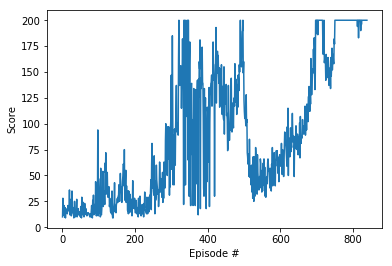

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Watch a Smart Agent!

In [ ]:
env = gym.make('CartPole-v0')

state = env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
for t in range(1000):
    action, _ = policy.act(state)
    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    state, reward, done, _ = env.step(action)
    if done:
        break 

env.close()